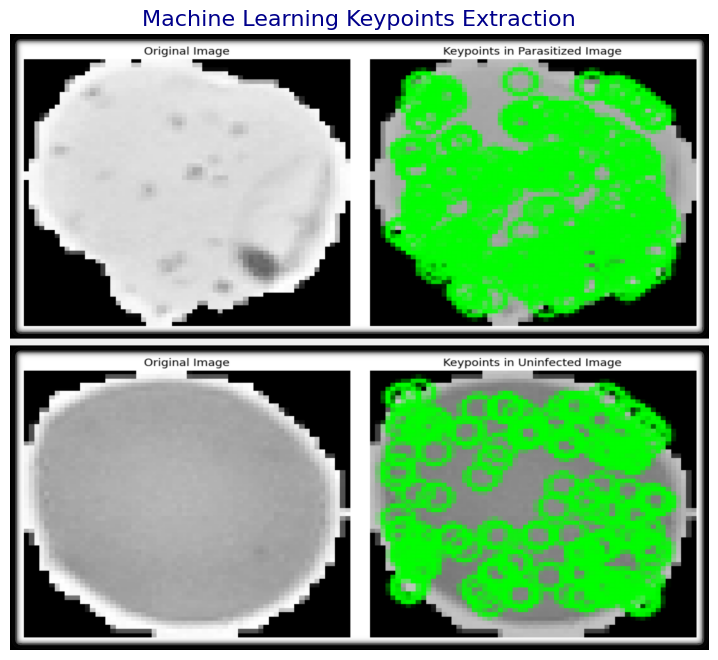

Combined image saved as 'keypoints.jpg'. Open it to view.


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Target dimensions
TARGET_WIDTH = 1400
TARGET_HEIGHT = 1100

# Load two images
img1 = cv2.imread('./paraoutput.png')
img2 = cv2.imread('./unparaoutput.png')

# Check if images are loaded
if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
    exit()

# Resize both images to the target width while maintaining aspect ratio
img1_resized = cv2.resize(img1, (TARGET_WIDTH, int(img1.shape[0] * TARGET_WIDTH / img1.shape[1])))
img2_resized = cv2.resize(img2, (TARGET_WIDTH, int(img2.shape[0] * TARGET_WIDTH / img2.shape[1])))

# Crop or stretch each image to make their combined height match the target height
half_height = TARGET_HEIGHT // 2  # Each image gets half the total height

# Resize the height of each image to half of the target height
img1_final = cv2.resize(img1_resized, (TARGET_WIDTH, half_height))
img2_final = cv2.resize(img2_resized, (TARGET_WIDTH, half_height))

def add_aesthetic_effects(image, padding=10, border_color=(255, 255, 255), radius=31):
    h, w, _ = image.shape

    # Add padding
    padded_image = cv2.copyMakeBorder(
        image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=border_color
    )

    # Create rounded corners
    mask = np.zeros_like(padded_image, dtype=np.uint8)
    cv2.rectangle(mask, (padding, padding), (w + padding, h + padding), (255, 255, 255), -1)

    # Ensure radius is odd for GaussianBlur
    radius = radius if radius % 2 == 1 else radius + 1
    mask = cv2.GaussianBlur(mask, (radius, radius), 0)

    return cv2.bitwise_and(padded_image, mask)


# Apply the aesthetic effects
img1_final = add_aesthetic_effects(img1_final, padding=20, border_color=(200, 200, 200), radius=50)
img2_final = add_aesthetic_effects(img2_final, padding=20, border_color=(200, 200, 200), radius=50)

# Add a light gray separator between the images
padding_between_images = 20
separator = np.ones((padding_between_images, img1_final.shape[1], 3), dtype=np.uint8) * 240  # Light gray separator

# Stack images vertically with a separator in between
combined_image = np.vstack((img1_final, separator, img2_final))


# Save the combined image
cv2.imwrite('keypoints.jpg', combined_image)

# Display using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')  # Hide axes for better visualization
plt.title("Machine Learning Keypoints Extraction", fontsize=16, color="darkblue")
plt.show()

print("Combined image saved as 'keypoints.jpg'. Open it to view.")

